In [1]:
import fitz  # instalar pip install PyMuPDF
import pandas as pd

# Lista de rutas a los archivos PDF
file_paths = [
    'data/train/file0.pdf',
    'data/train/file1.pdf',
    'data/train/file2.pdf',    
    'data/train/file3.pdf', 
    'data/train/file5.pdf',
    'data/train/file6.pdf',    
    'data/train/file7.pdf',    
    'data/train/file8.pdf',
    'data/train/file9.pdf',
    'data/train/file10.pdf',
    'data/train/file11.pdf',    
    'data/train/file12.pdf',    
    'data/train/file13.pdf',
    'data/train/file14.pdf',
    'data/train/file15.pdf',
    'data/train/file16.pdf',    
    'data/train/file17.pdf',  
    'data/train/file18.pdf', 
    'data/train/file19.pdf',
    'data/train/file20.pdf',
    'data/train/file21.pdf',
    'data/train/file22.pdf',
    'data/train/file25.pdf', 
    'data/train/file26.pdf',
    # Agregar aquí las rutas de los 29 documentos
]

# Lista para almacenar el texto de cada documento
documents = []

# Función para leer un archivo PDF y extraer su texto
def read_pdf(file_path):
    document = fitz.open(file_path)
    text = ""
    for page_num in range(len(document)):
        page = document.load_page(page_num)
        text += page.get_text()
    return text

# Leer cada archivo PDF y agregar el texto a la lista
for path in file_paths:
    text = read_pdf(path)
    documents.append(text)

# Crear un DataFrame a partir de la lista de textos
df = pd.DataFrame({'document': documents})

df  # Mostrar los primeros registros del DataFrame

,document
0,REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...
1,REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...
2,REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...
3,REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...
4,REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...
5,REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...
6,REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...
7,REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...
8,REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...
9,REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Eliminar caracteres especiales y números
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar stop words
    stop_words = set(stopwords.words('spanish'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Lemmatización
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

# Aplicar preprocesamiento a cada documento
documents = [preprocess_text(doc) for doc in df['document']]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdjqp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mdjqp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Lista de culpabilidad
culpability = [
    'inocente','culpable','culpable','culpable', 'inocente', 'inocente', 
    'inocente', 'culpable', 'inocente', 'culpable', 'culpable', 'inocente', 
    'inocente', 'culpable', 'inocente', 'culpable', 'culpable',  'culpable', 
    'inocente', 'inocente', 'inocente', 'culpable', 'culpable', 'culpable',
]

# Crea un DataFrame de Pandas
df_final = pd.DataFrame({'document': documents, 'culpability': culpability})

print(df_final)

                                             document culpability
0   república ecuador www funcionjudicial gob ec u...    inocente
1   república ecuador www funcionjudicial gob ec u...    culpable
2   república ecuador www funcionjudicial gob ec u...    culpable
3   república ecuador www funcionjudicial gob ec s...    culpable
4   república ecuador www funcionjudicial gob ec u...    inocente
5   república ecuador www funcionjudicial gob ec u...    inocente
6   república ecuador www funcionjudicial gob ec s...    inocente
7   república ecuador www funcionjudicial gob ec u...    culpable
8   república ecuador www funcionjudicial gob ec u...    inocente
9   república ecuador www funcionjudicial gob ec u...    culpable
10  república ecuador www funcionjudicial gob ec u...    culpable
11  república ecuador www funcionjudicial gob ec u...    inocente
12  república ecuador www funcionjudicial gob ec u...    inocente
13  república ecuador www funcionjudicial gob ec u...    culpable
14  repúbl

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Realiza TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_final['document']).toarray()
print("Forma de la matriz X:", X.shape) # Imprime la forma de la matriz X

Forma de la matriz X: (24, 1000)


In [5]:
X

array([[0.        , 0.03716905, 0.        , ..., 0.        , 0.        ,
        0.02570132],
       [0.02639851, 0.00622971, 0.        , ..., 0.        , 0.00204671,
        0.00215383],
       [0.00296229, 0.03320545, 0.        , ..., 0.07114873, 0.        ,
        0.        ],
       ...,
       [0.09061892, 0.00084861, 0.02227396, ..., 0.        , 0.00780644,
        0.00821503],
       [0.09550714, 0.02012364, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03353273, 0.01978324, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Dividir los datos en características (X) y etiquetas (y)
X_train = df_final['document']  # Suponiendo que 'document' contiene el texto de los documentos
y_train = df_final['culpability']  # Suponiendo que 'culpability' contiene las etiquetas de clase
X_test = df_final['document']

# Definir el clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='cosine')

# Crear un pipeline con el vectorizador y el clasificador
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('knn', knn_classifier)
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir las etiquetas de clase para los datos de prueba
y_pred = pipeline.predict(X_test)
print("Eficiencia:", accuracy_score(y_train, y_pred))


Eficiencia: 0.7916666666666666


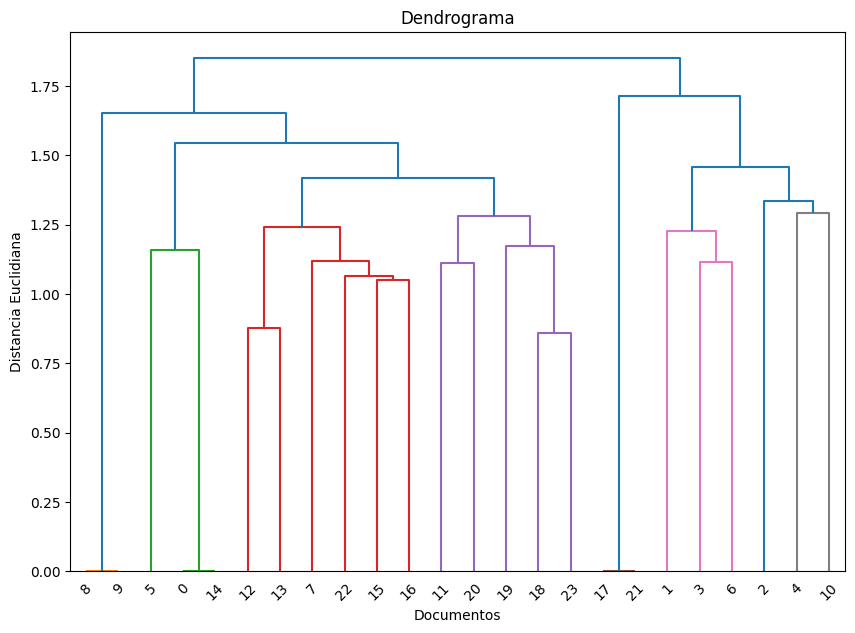

In [8]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# KMeans Clustering
kmeans = KMeans(2, random_state=42, n_init=10)
kmeans.fit(X)
clusters = kmeans.labels_

# Dendrograma para DHC
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Documentos')
plt.ylabel('Distancia Euclidiana')
plt.show()


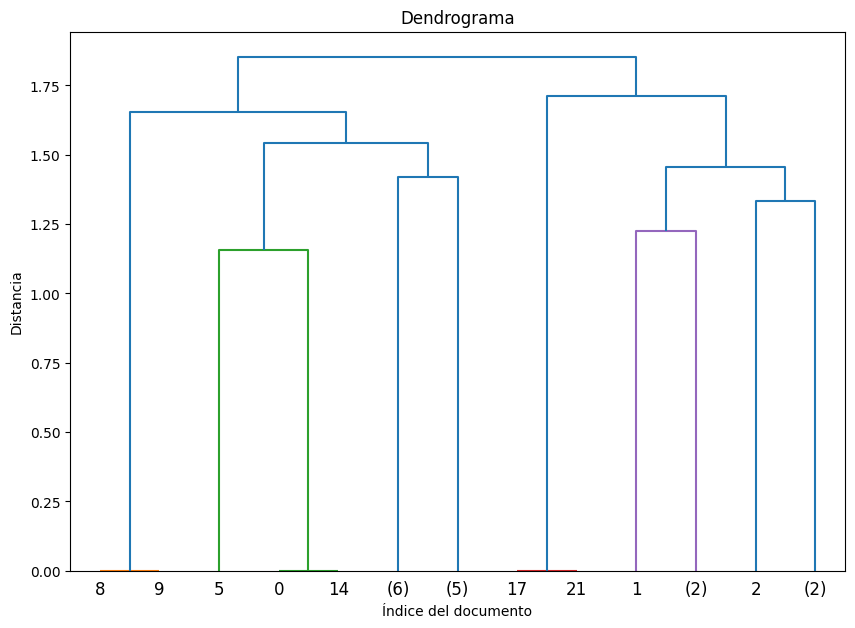

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering jerárquico aglomerativo (DHC)
Z = linkage(X, 'ward')

# Dendrograma para determinar el número de clusters
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Dendrograma')
plt.xlabel('Índice del documento')
plt.ylabel('Distancia')
plt.show()

In [10]:
# Determinar el número óptimo de clusters
optimal_clusters = 2  # Este número debe ser determinado a partir del dendrograma

# Asignar los clusters a los documentos
df['cluster'] = fcluster(Z, optimal_clusters, criterion='maxclust')

# Mostrar los primeros registros del DataFrame con la asignación de clusters
print(df.head(15))


                                             document  cluster
0   REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        1
1   REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        2
2   REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        2
3   REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        2
4   REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        2
5   REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        1
6   REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        2
7   REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        1
8   REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        1
9   REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        1
10  REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        2
11  REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        1
12  REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        1
13  REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...        1
14  REPÚBLICA DEL ECUADOR\nwww.funcionjudicial.gob...  

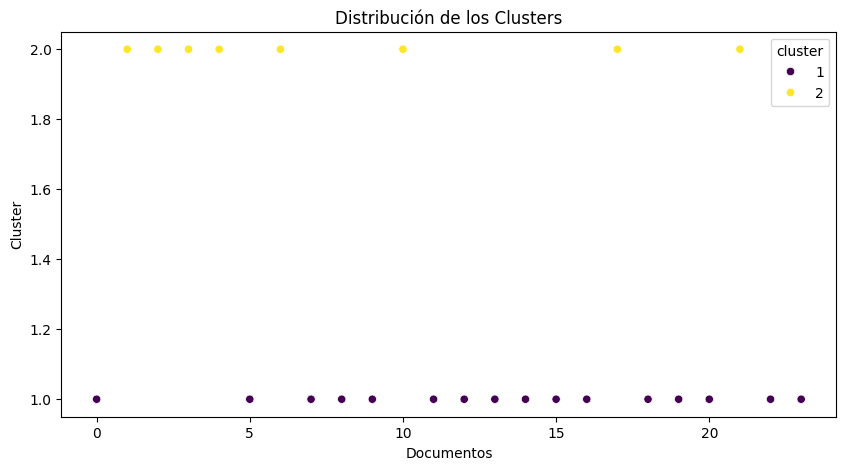

In [11]:
# Visualización de los clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y=df['cluster'], hue=df['cluster'], palette='viridis')
plt.title('Distribución de los Clusters')
plt.xlabel('Documentos')
plt.ylabel('Cluster')
plt.show()

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear un diccionario para mapear las etiquetas de culpabilidad a valores numéricos
label_map = {'inocente': 0, 'culpable': 1}

# Mapear las etiquetas reales a valores numéricos (asumiendo que 'culpability' está en df_final)
y_true = df_final['culpability'].map(label_map)

# Calcular la precisión del clustering comparando los clusters obtenidos con las etiquetas reales
accuracy = accuracy_score(y_true, df['cluster'])

# Calcular la matriz de confusión para evaluar el rendimiento del clustering
conf_matrix = confusion_matrix(y_true, df['cluster'])

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular y mostrar el informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_true, df['cluster'], labels=[0, 1, 2, 3], target_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']))


# Mostrar la precisión del clustering
print(f"\nPrecisión del Clustering: {accuracy:.2f}")


Matriz de Confusión:
[[0 9 2]
 [0 7 6]
 [0 0 0]]

Informe de Clasificación:
              precision    recall  f1-score   support

   Cluster 0       0.00      0.00      0.00        11
   Cluster 1       0.44      0.54      0.48        13
   Cluster 2       0.00      0.00      0.00         0
   Cluster 3       0.00      0.00      0.00         0

   micro avg       0.29      0.29      0.29        24
   macro avg       0.11      0.13      0.12        24
weighted avg       0.24      0.29      0.26        24


Precisión del Clustering: 0.29


C:\Users\mdjqp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdjqp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdjqp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

In [13]:
# Leer y preprocesar el documento de prueba
test_document_path = 'data/test/file29.pdf'  # Reemplaza 'ruta_del_documento.pdf' con la ruta de tu documento
test_document_text = read_pdf(test_document_path)
preprocessed_test_document = preprocess_text(test_document_text)

# Convertir el documento de prueba en una representación TF-IDF
test_document_vector = vectorizer.transform([preprocessed_test_document]).toarray()

# Asignar el documento de prueba a un cluster usando el modelo entrenado
test_cluster = kmeans.predict(test_document_vector)

print("El documento de prueba pertenece al cluster:", test_cluster[0])

El documento de prueba pertenece al cluster: 1


In [15]:
import pickle

# Save the TF-IDF vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Save the K-means model
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)
